In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
electricity_consumption = pd.read_excel("ElectricityByCounty_alameda_ca.xlsx")

In [3]:
electricity_consumption = electricity_consumption.transpose()

In [4]:
electricity_consumption.drop(['County', 'Sector', 'Total Usage'], inplace=True)

In [5]:
electricity_consumption

,0
2021,3308.25946
2020,3308.467553
2019,3015.393947
2018,2948.368675
2017,2995.051965
2016,2920.921179
2015,2897.493974
2014,2894.253363
2013,2986.226437
2012,2999.683662


In [6]:
lr = LinearRegression()

In [7]:
electricity_consumption.values

array([[3308.25946],
       [3308.467553],
       [3015.393947],
       [2948.368675],
       [2995.051965],
       [2920.921179],
       [2897.493974],
       [2894.253363],
       [2986.226437],
       [2999.683662],
       [3024.848218],
       [3021.677436],
       [3016.750714],
       [2996.423893],
       [2971.909026],
       [3118.292069],
       [3025.275108],
       [2897.838896],
       [2937.121764],
       [2811.630947],
       [2745.213966],
       [2926.11798],
       [2890.767335],
       [2791.331173],
       [2674.834394],
       [2615.308775],
       [2548.457958],
       [2774.566317],
       [2529.229286],
       [2465.000074],
       [2515.20997],
       [2498.265626]], dtype=object)

In [8]:
lr.fit(electricity_consumption.index.values.reshape(-1, 1), electricity_consumption.values)

LinearRegression()

In [9]:
lr.predict(np.array(2022).reshape(-1, 1))

array([[3195.94062518]])

In [10]:
lr.predict(np.array(2023).reshape(-1, 1))

array([[3215.2586344]])

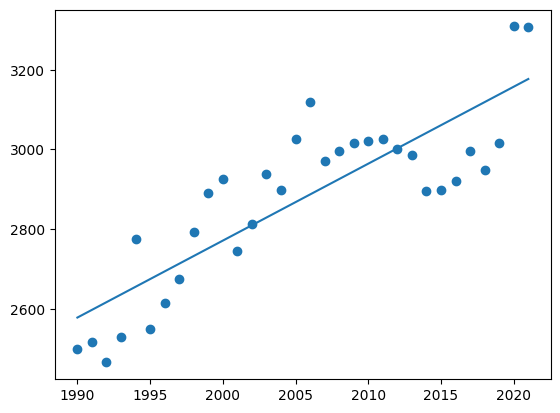

In [11]:
plt.scatter(electricity_consumption.index.values.tolist(), electricity_consumption.values.tolist())
plt.plot(electricity_consumption.index.values.tolist(),
         [lr.coef_[0]*i + lr.intercept_[0] for i in electricity_consumption.index.values.tolist()])

In [12]:
lr.coef_

array([[19.31800922]])

In [13]:
lr.intercept_

array([-35865.07400865])

In [14]:
electricity_consumption.reset_index(inplace=True)

In [15]:
electricity_consumption[1] = electricity_consumption['index'].values**2
electricity_consumption[2] = electricity_consumption['index'].values**3

In [16]:
electricity_consumption

,index,0,1,2
0,2021,3308.25946,4084441,8254655261
1,2020,3308.467553,4080400,8242408000
2,2019,3015.393947,4076361,8230172859
3,2018,2948.368675,4072324,8217949832
4,2017,2995.051965,4068289,8205738913
5,2016,2920.921179,4064256,8193540096
6,2015,2897.493974,4060225,8181353375
7,2014,2894.253363,4056196,8169178744
8,2013,2986.226437,4052169,8157016197
9,2012,2999.683662,4048144,8144865728


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
electricity_consumption[['index', 1, 2]]

,index,1,2
0,2021,4084441,8254655261
1,2020,4080400,8242408000
2,2019,4076361,8230172859
3,2018,4072324,8217949832
4,2017,4068289,8205738913
5,2016,4064256,8193540096
6,2015,4060225,8181353375
7,2014,4056196,8169178744
8,2013,4052169,8157016197
9,2012,4048144,8144865728


In [19]:
x = MinMaxScaler().fit_transform(electricity_consumption[['index', 1, 2]].values)

In [20]:
lr1 = LinearRegression()

In [21]:
lr1.fit(x, electricity_consumption[0])

LinearRegression()

In [22]:
lr1.coef_

array([ 25979672.49299028, -51881686.82959579,  25902799.95784306])

In [23]:
lr1.intercept_

2388.249217260956

In [24]:
y = [lr1.coef_[0]*i + lr1.coef_[1]*j + lr1.coef_[2]*k + lr1.intercept_ for i, j, k in x]

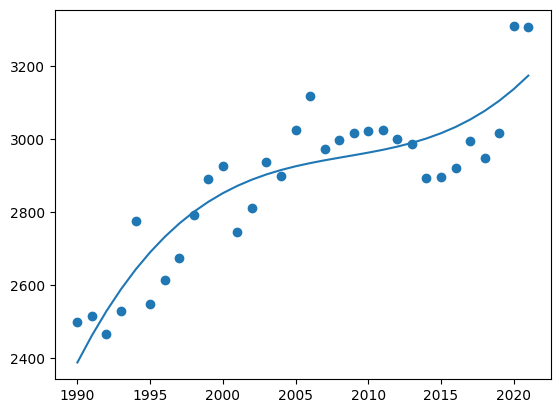

In [25]:
plt.scatter(electricity_consumption['index'].values.tolist(), electricity_consumption[0].values.tolist())
plt.plot(electricity_consumption['index'].values.tolist(), y)